In [2]:
# Install necessary libraries
!pip install scikit-learn
!pip install scikit-multilearn

# Organizando una Biblioteca de Música
Imagina que tienes una gran colección de música y deseas organizarla digitalmente. Cada canción puede pertenecer a múltiples categorías o "etiquetas" al mismo tiempo, como géneros (rock, jazz), estados de ánimo (alegre, melancólico), o incluso actividades para las cuales es adecuada (estudiar, hacer ejercicio).

Objetivo: Automatizar la organización de tu colección, asignando cada canción a todas las categorías relevantes de manera precisa.

In [4]:
from sklearn.datasets import make_multilabel_classification
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, hamming_loss, f1_score


* Crearemos un dataset sintético para multi-label classification usando make_multilabel_classification.
* Conjunto simulado de datos de música, que representa varias canciones, cada una con múltiples etiquetas (géneros, estados de ánimo).

In [5]:
# Generar datos sintéticos para multi-label classification
X, y = make_multilabel_classification(n_samples=1000, n_classes=5, n_labels=3, random_state=42)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Algoritmos para clasificación de etiquetas múltiples
## Binary Relevance
Este es el enfoque más sencillo, donde cada etiqueta se trata como un problema de clasificación binaria independiente. El clasificador binario de cada etiqueta está entrenado para predecir su presencia o ausencia.

## Label Powerset
Este enfoque trata cada combinación única de etiquetas como una única clase. Este método es eficaz para un número limitado de etiquetas.

## Classifier Chains
Las cadenas clasificadoras amplían la relevancia binaria al considerar las correlaciones entre etiquetas. Cada etiqueta se predice en una secuencia, considerando las predicciones de etiquetas anteriores.

## Multi-Label k-Nearest Neighbors (MLkNN)
MLkNN es una adaptación del algoritmo k-Vecinos más cercanos para clasificación de etiquetas múltiples. Predice las etiquetas basándose en las etiquetas de los k vecinos más cercanos.

In [6]:
# Inicializar Binary Relevance con RandomForestClassifier
classifier = BinaryRelevance(classifier=RandomForestClassifier(), require_dense=[False,True])

# Entrenar el clasificador con el conjunto de entrenamiento
classifier.fit(X_train, y_train)


BinaryRelevance(classifier=RandomForestClassifier(),
                require_dense=[False, True])

- Ventajas: Es intuitivo y fácil de implementar. Funciona bien como una línea de base para comparar enfoques más complejos.
- Desventajas: Puede ignorar la correlación entre las etiquetas, lo que en  algunos casos puede ser útil para mejorar el rendimiento del modelo.

In [10]:
# Predicciones sobre el conjunto de prueba
predictions = classifier.predict(X_test)
predictions

<300x5 sparse matrix of type '<class 'numpy.int64'>'
	with 788 stored elements in Compressed Sparse Column format>

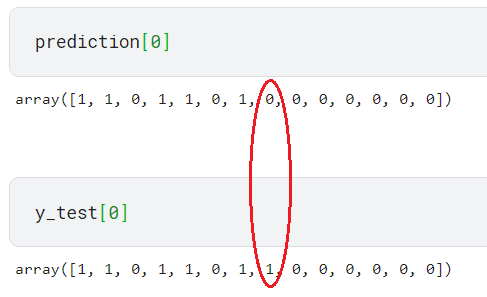

In [7]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, predictions)
hamming = hamming_loss(y_test, predictions)
f1 = f1_score(y_test, predictions, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Hamming Loss: {hamming}")
print(f"F1 Score: {f1}")


Accuracy: 0.37666666666666665
Hamming Loss: 0.218
F1 Score: 0.7251718471680472


- **Hamming Loss**:  Proporciona una medida de cuántas veces, en promedio, se equivoca el clasificador en etiquetar una instancia.
- **F1-Score**: Balancea la precisión y la recuperación, crucial para datasets con desequilibrios de clase.

El **Hamming Loss** y el **Accuracy** son métricas que nos ayudan a entender cómo de bien un modelo de clasificación multi-etiqueta está funcionando, pero cada una desde su perspectiva. El **Hamming Loss** se enfoca en los detalles, mirando cada error de etiqueta individualmente, lo cual es genial para entender y mejorar partes específicas del modelo, especialmente en situaciones donde las etiquetas están desbalanceadas o algunas son más críticas que otras. Por otro lado, el **Accuracy** es más estricto, ya que considera una predicción correcta solo cuando todas las etiquetas de una instancia son predichas perfectamente, lo cual puede ser engañoso en datos desequilibrados. En resumen, mientras el **Hamming Loss** te ofrece una vista granular y equitativa del rendimiento a nivel de etiqueta, ideal para afinar tu modelo, el **Accuracy** te da una perspectiva general que puede no capturar bien la complejidad de las tareas multi-etiqueta. Usar ambas métricas en conjunto te brinda un panorama completo del rendimiento de tu modelo.

# LINKS DE REFERENCIA:
* https://medium.com/@evertongomede/multi-label-classification-in-python-empowering-machine-learning-with-versatility-9dbae34aacdb
* https://www.kdnuggets.com/2023/08/multilabel-classification-introduction-python-scikitlearn.html
* https://www.kaggle.com/competitions/playground-series-s4e3/discussion/481019
* https://medium.com/@ilyurek/multi-label-classification-with-python-a-simple-guide-c0fe04471ad7
* https://medium.com/gumgum-tech/creating-balanced-multi-label-datasets-for-model-training-and-evaluation-16b6a3a2d912
* https://medium.com/gumgum-tech/creating-a-balanced-multi-label-dataset-for-machine-learning-9945abad2616